# **Day** 01

What is Image Recognition?

What is Deep Learning?

What is a Dataset?

Why Preprocessing?

What is EDA (Exploratory Data Analysis)?

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yatinyadavnda100","key":"c14c610770a5f854a35a8e89668a149a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


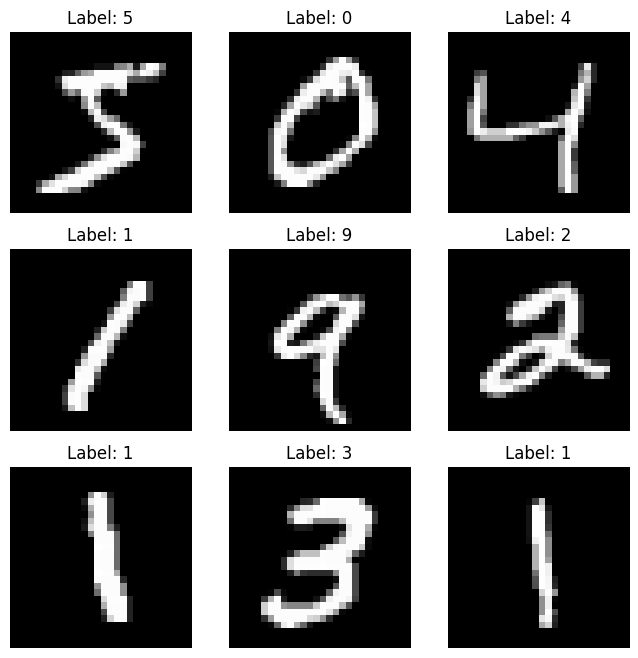

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


# DAY **02**

**What is a Convolutional Neural Network (CNN)?**


**How does model training work?**


**Why do we use Dropout?**


**How to evaluate a model?**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8986 - loss: 0.3292 - val_accuracy: 0.9827 - val_loss: 0.0592
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9842 - loss: 0.0472 - val_accuracy: 0.9852 - val_loss: 0.0523
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9744 - val_loss: 0.0915
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9920 - loss: 0.0241 - val_accuracy: 0.9849 - val_loss: 0.0505
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9896 - val_loss: 0.0400


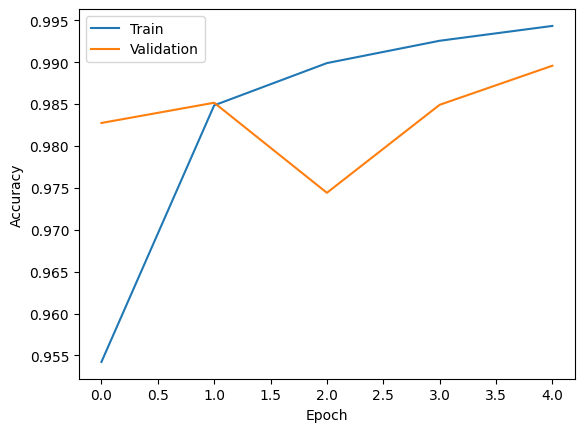

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9875 - loss: 0.0389
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Day **03**

Why deeper CNNs?

What is Data Augmentation?

What is Advanced Evaluation Metrics?

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 72ms/step - accuracy: 0.3486 - loss: 1.7726 - val_accuracy: 0.5049 - val_loss: 1.3635
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.5261 - loss: 1.3269 - val_accuracy: 0.5176 - val_loss: 1.4275
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 70ms/step - accuracy: 0.5799 - loss: 1.1895 - val_accuracy: 0.6010 - val_loss: 1.1851
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.6138 - loss: 1.1029 - val_accuracy: 0.6283 - val_loss: 1.1102
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.6338 - loss: 1.0559 - val_accuracy: 0.6757 - val_loss: 0.9534
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.6498 - loss: 1.0244 - val_accuracy: 0.6325 - val_loss: 1.0962
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.6575 - loss: 0.9821 - val_accuracy: 0.6676 - val_loss: 0.9500
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.6704 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1000
           1       0.90      0.75      0.82      1000
           2       0.81      0.28      0.41      1000
           3       0.54      0.50      0.52      1000
           4       0.52      0.78      0.63      1000
           5       0.70      0.49      0.58      1000
           6       0.64      0.86      0.74      1000
           7       0.71      0.71      0.71      1000
           8       0.83      0.72      0.77      1000
           9       0.54      0.94      0.68      1000

    accuracy                           0.66     10000
   macro avg       0.70      0.66      0.66     10000
weighted avg       0.70      0.66      0.66     10000



<function matplotlib.pyplot.show(close=None, block=None)>

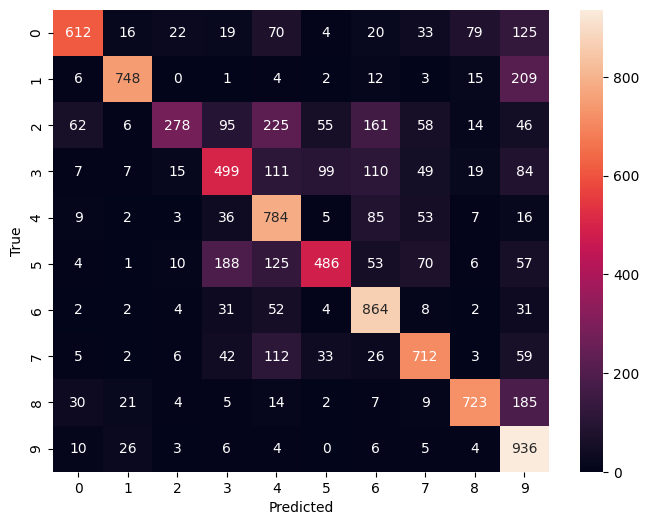

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

# DAY **04**

What are pre-trained model?
MobileNetV2 , ResNet ,VGG ,ImageNet

What is Transfer Learning?

How to Fine-Tune and Optimize?

How to Deploy a Model?

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 209M/218M [00:00<00:00, 425MB/s] 
100% 218M/218M [00:00<00:00, 419MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.7870 - loss: 0.5349 - val_accuracy: 0.7985 - val_loss: 0.5080
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.7957 - loss: 0.5000 - val_accuracy: 0.7985 - val_loss: 0.5279
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.8013 - loss: 0.4888 - val_accuracy: 0.7985 - val_loss: 0.5211
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.8022 - loss: 0.4659 - val_accuracy: 0.7975 - val_loss: 0.5212
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.8071 - loss: 0.4481 - val_accuracy: 0.7985 - val_loss: 0.5737


In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1531s 6s/step - accuracy: 0.7967 - loss: 0.5118 - val_accuracy: 0.7985 - val_loss: 0.5469
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1493s 6s/step - accuracy: 0.8041 - loss: 0.4486 - val_accuracy: 0.7980 - val_loss: 0.5479
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1459s 6s/step - accuracy: 0.8058 - loss: 0.4266 - val_accuracy: 0.7975 - val_loss: 0.5451


In [23]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step


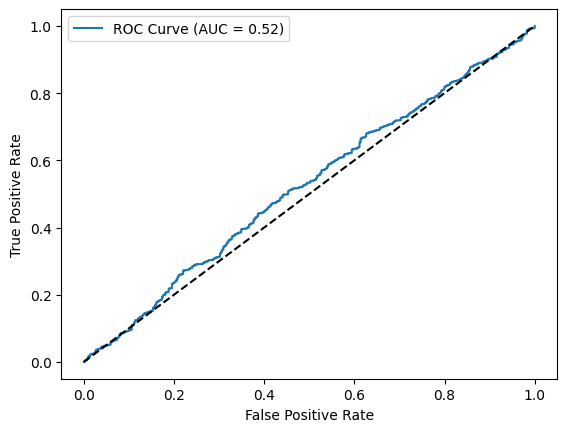

In [24]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **Day 05**

How to Predict on New Data?

How to Create Portfolio Assets?


How to Present Results?


In [27]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = '/content/Cat_November_2010-1a.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving Cat_November_2010-1a.jpg to Cat_November_2010-1a (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Dog


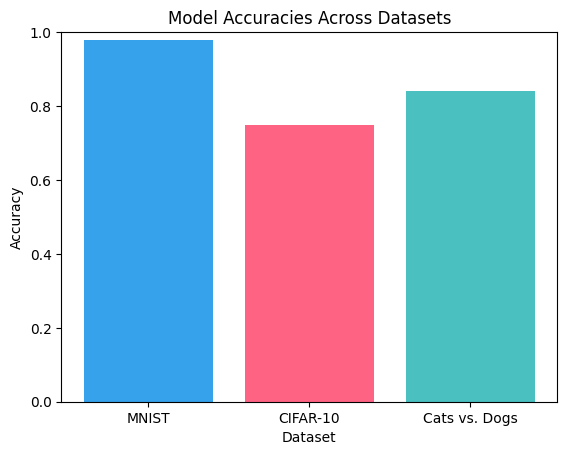

In [28]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()